## Import All Relevant Libraries

In [360]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from ydata_profiling import ProfileReport 

## Loading The Data
Read From CSV File And Convert To A Pandas Dataframe

In [362]:
df = pd.read_csv('final_data.csv')

## Viewing The Dataframe

In [364]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [365]:
df.tail(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [367]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,10754.0,1.812404e+02,6.969818e+00,156.0,176.000000,1.812404e+02,1.860000e+02,2.060000e+02
age,10754.0,2.604190e+01,4.777629e+00,15.0,22.000000,2.600000e+01,2.900000e+01,4.300000e+01
appearance,10754.0,3.640701e+01,2.652654e+01,0.0,12.000000,3.500000e+01,5.900000e+01,1.070000e+02
goals,10754.0,1.255543e-01,2.355851e-01,0.0,0.000000,4.596918e-02,1.722625e-01,1.125000e+01
assists,10754.0,8.697765e-02,1.433513e-01,0.0,0.000000,4.077323e-02,1.331361e-01,4.000000e+00
yellow cards,10754.0,1.897572e-01,4.323879e-01,0.0,0.053191,1.502504e-01,2.482759e-01,3.000000e+01
second yellow cards,10754.0,4.665667e-03,2.523200e-02,0.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
red cards,10754.0,6.826070e-03,8.114266e-02,0.0,0.000000,0.000000e+00,0.000000e+00,6.923077e+00
goals conceded,10754.0,1.316555e-01,4.423355e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+00
clean sheets,10754.0,4.488090e-02,9.244373e-01,0.0,0.000000,0.000000e+00,0.000000e+00,9.000000e+01


In [368]:
df.describe(include="object").T

,count,unique,top,freq
player,10754,10754,/alexander-badolato/profil/spieler/957230,1
team,10754,374,Daejeon Hana Citizen,46
name,10754,10584,Paulinho,6
position,10754,16,Defender Centre-Back,1821


## Data Profiling

In [370]:
# profile = ProfileReport(df, title="Football Players Transfer")

In [371]:
# profile.to_notebook_iframe()

## Data Quality Checks

### Uniqueness

In [374]:
df.duplicated().sum()

0

### Completeness

In [376]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

## Simple EDA + Data Quality Checking

### I Will Remove Player Column 

In [379]:
# It Is A Picture Path And I Do Not Need It

In [380]:
df = df.drop('player', axis=1)

In [381]:
# I Do Not Need Player Name In Next Step

In [382]:
df = df.drop('name', axis=1)

In [383]:
# I Do Not Need Player Position In Next Step

In [384]:
df = df.drop('position', axis=1)

In [385]:
# I Do Not Need Player Team In Next Step

In [386]:
df = df.drop('team', axis=1)

In [387]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'position_encoded', 'winger'],
      dtype='object')

In [388]:
# Clean Out Laiers

## Preprocess The Data

In [390]:
# df_1 = df[(df['highest_value'] >= 2000000) & (df['highest_value'] <= 160000000)]
# chart = px.histogram(df_1, x="highest_value", nbins = 150)
# chart.update_layout(bargap=0.2)
# chart.show()

In [391]:
df = df[(df['height'] >= 162) & (df['height'] <= 200)]

In [392]:
df = df[(df['age'] > 14) & (df['age'] < 40)]

In [393]:
df = df[(df['appearance'] <= 87)]

In [394]:
df = df[(df['goals'] >= 0)]

In [395]:
df = df[(df['assists'] >= 0)]

In [396]:
df = df[(df['yellow cards'] >= 0)]

In [397]:
df = df[(df['minutes played'] >= 0) & (df['minutes played'] <= 7000)]

In [398]:
df = df[(df['days_injured'] >= 0)]

In [399]:
df = df[(df['games_injured'] >= 0)]

In [400]:
df = df[(df['games_injured'] >= 0)]

In [401]:
df = df[(df['highest_value'] >= 0)]

In [402]:
df = df[(df['position_encoded'] > 0)]

In [403]:
df.shape

(10371, 18)

## Feature Engineering

In [405]:
# df = pd.get_dummies(df, columns=categorical_features)

## Feature Selection

In [407]:
correlation = df.corr()

In [408]:
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.791273
appearance             0.377159
minutes played         0.367937
award                  0.249132
games_injured          0.158667
days_injured           0.131109
assists                0.120544
goals                  0.112471
position_encoded       0.083723
height                 0.034023
winger                 0.012213
red cards             -0.007883
yellow cards          -0.007985
second yellow cards   -0.011970
clean sheets          -0.013008
age                   -0.055863
goals conceded        -0.069930
Name: current_value, dtype: float64


In [409]:
# Set the correlation threshold

In [410]:
threshold = 0.15

In [411]:
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index

In [412]:
selected_features

Index(['appearance', 'minutes played', 'games_injured', 'award',
       'current_value', 'highest_value'],
      dtype='object')

In [413]:
col = df.columns

In [414]:
for c in col:
    print(c)

height
age
appearance
goals
assists
yellow cards
second yellow cards
red cards
goals conceded
clean sheets
minutes played
days_injured
games_injured
award
current_value
highest_value
position_encoded
winger


In [415]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


In [416]:
# Prepare Data

In [417]:
df = df[df['current_value'] < 70000000]

In [418]:
X = df.drop(['current_value'], axis=1)

In [419]:
y = df['current_value']

In [420]:
# Split Data Into Training And Testing Sets

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [422]:
# Sacle The Data

In [423]:
scaler = StandardScaler()

In [424]:
scaler.fit(X_train)

StandardScaler()

In [425]:
X_train_scaled = scaler.transform(X_train)

In [426]:
X_test_scaled = scaler.transform(X_test)

In [427]:
X.shape

(10350, 17)

## Buliding The Model

In [429]:
LR = LinearRegression()

## Train The Model

In [431]:
LR.fit(X_train_scaled, y_train)

LinearRegression()

## Test The Model

In [433]:
y_pred = LR.predict(X_test_scaled)

## Interpretation Of The Model

In [435]:
coeff_df = pd.DataFrame(LR.coef_,X.columns,columns=['Coefficient'])

In [436]:
coeff_df

,Coefficient
height,5.508099e+04
age,-8.508361e+05
appearance,-6.118097e+05
goals,1.278026e+05
assists,9.764913e+04
yellow cards,2.896190e+04
second yellow cards,-4.879232e+03
red cards,-8.064621e+03
goals conceded,-1.045596e+05
clean sheets,3.538130e+04


In [437]:
print(LR.intercept_) 

2814833.3333333335


## Evaluating The Model

In [439]:
# Mean Square Error

In [440]:
y_base = [y_train.mean()] * len(y_test)

In [441]:
mse_base = mean_squared_error(y_test, y_base )

In [442]:
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 36717967372383.26


In [443]:
mse_train = mean_squared_error(y_train, LR.predict(X_train_scaled))

In [444]:
mse_test = mean_squared_error(y_test, y_pred)

In [445]:
print(f'Mean Squared Error for training: {mse_train}')

Mean Squared Error for training: 12095012902395.443


In [446]:
mse_train <= 12095012902395.443

True

In [447]:
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for testing: 12538090337925.758


In [448]:
mse_base > mse_train

True

In [449]:
mse_base > mse_test

True

## Mean Absolute Error

In [451]:
mse_base = mean_absolute_error(y_test, y_base )

In [452]:
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 3241866.827697262


In [453]:
mae_train = mean_absolute_error(y_train, LR.predict(X_train_scaled))

In [454]:
mae_test = mean_absolute_error(y_test, y_pred)

In [455]:
print(f'Mean Absolute Error for training: {mae_train}')

Mean Absolute Error for training: 1809868.3412703394


In [456]:
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for testing: 1864472.7027265176


In [457]:
mse_base > mse_train

False

In [458]:
mse_base > mse_test

False

## Root Mean Squared Error

In [460]:
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1800.518488574128


In [461]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')

Root Mean Squared Error for training: 3477788.5074275928


In [462]:
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for testing: 3540916.595731359


In [463]:
np.sqrt(mse_base) > np.sqrt(mse_train)

False

In [464]:
np.sqrt(mse_base) > np.sqrt(mse_test)

False

## R Square

In [466]:
r2_score_train = r2_score(y_train, LR.predict(X_train_scaled))

In [467]:
r2_score_test = r2_score(y_test, y_pred)

In [468]:
print(f'R Square for training: {r2_score_train}')

R Square for training: 0.6599495549525262


In [469]:
print(f'R Square for testing: {r2_score_test}')

R Square for testing: 0.6584907702557231


## Predictions vs. Real Values

In [471]:
predictions = LR.predict(X_test_scaled)

In [472]:
Real_Values = np.array(y_test)

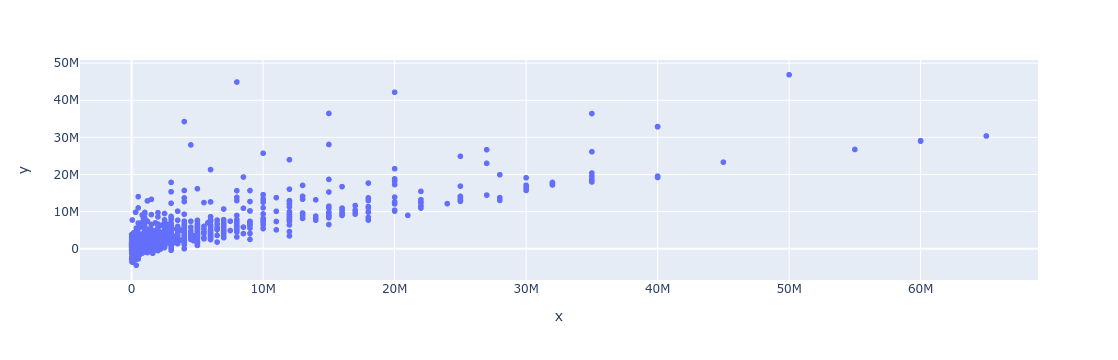

In [473]:
chart = px.scatter(x = Real_Values, y = predictions)
chart.show()

## Residual Histogram

In [475]:
hist_data = [y_test-predictions]

In [476]:
group_labels = ['distplot']

In [477]:
chart = ff.create_distplot(hist_data, group_labels)

In [478]:
chart.show()